In [1]:
import os
import sys

In [2]:
main_dir = os.path.dirname(os.getcwd())

In [3]:
import cv2

In [4]:
yolo_dir = os.path.join(main_dir, 'models/yolo')
darknet_dir = os.path.join(main_dir, 'models/darknet')
darknet_script_dir = os.path.join(main_dir, 'models/darknet_python')

sys.path.append(darknet_script_dir)
import darknet
import numpy as np
import time
from matplotlib import pyplot as plt
from utils import tile_image, append_tiles_image, tiles_info, box_new_coords, detect_over_frames, non_max_suppression, write_cpu_usage_file
from tqdm import tqdm
import json
import psutil
import argparse

In [5]:
confidence = 0.5

In [6]:
cfg_path = os.path.join(yolo_dir, "yolov3.cfg")
weights_path = os.path.join(yolo_dir, "yolov3.weights")
meta_path = os.path.join(yolo_dir,"coco.data")


In [7]:
net = darknet.load_net(bytes(cfg_path, encoding='utf-8'), bytes(weights_path, encoding='utf-8'), 0)
meta = darknet.load_meta(bytes(meta_path, encoding='utf-8'))

In [37]:
img_path = os.path.join(darknet_dir, "data/horses.jpg")
img_array = cv2.imread(img_path)


In [38]:
img_array

array([[[177, 148, 139],
        [177, 148, 139],
        [177, 148, 139],
        ...,
        [187, 154, 138],
        [188, 154, 138],
        [188, 154, 138]],

       [[177, 148, 139],
        [177, 148, 139],
        [177, 148, 139],
        ...,
        [188, 155, 139],
        [189, 155, 139],
        [189, 155, 139]],

       [[177, 148, 139],
        [177, 148, 139],
        [177, 148, 139],
        ...,
        [189, 156, 141],
        [189, 156, 140],
        [190, 156, 140]],

       ...,

       [[ 93, 123, 142],
        [ 95, 117, 135],
        [107, 125, 142],
        ...,
        [ 81, 106, 122],
        [ 79, 102, 118],
        [111, 131, 148]],

       [[102, 129, 150],
        [113, 137, 157],
        [126, 146, 164],
        ...,
        [ 74, 100, 117],
        [ 92, 116, 134],
        [ 86, 108, 126]],

       [[ 48,  72,  96],
        [ 80, 104, 124],
        [ 98, 120, 138],
        ...,
        [ 90, 116, 133],
        [ 76, 100, 118],
        [ 51,  73,  91]]

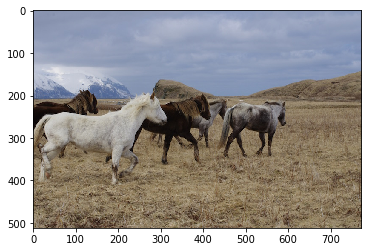

In [39]:
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
plt.show()

In [40]:
detections = darknet.detect(net, meta, img_array)

In [41]:
boxes 

[]

In [42]:
boxes = []
confidences = []


for detection in detections:
    _class = detection[0].decode("utf-8")
    if _class == 'person':
        _confidence = detection[1]
        if _confidence > confidence:
            confidences.append(_confidence)
            
            (centerX, centerY, width, height) = detection[2]
            #(startX, startY, endX, endY) = detection[2]
            
            # use the center (x, y)-coordinates to derive the top
            # and and left corner of the bounding box
            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))
            
            
            boxes.append([int(x), int(y), int(width), int(height)])
            #test
            (startX, startY, endX, endY) = boxes[-1]
            cv2.rectangle(img_array, (startX, startY), (startX+endX, startY+endY), (0, 255, 0), 2)

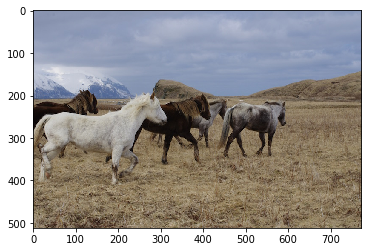

In [46]:
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
plt.show()

In [44]:
boxes

[]

In [47]:
gt_box = [144, 225, 163, 261]

In [48]:
pred_box = [612, 346, 39, 98]

In [49]:
x1_t, y1_t, x2_t, y2_t = gt_box

In [50]:
x1_p, y1_p, x2_p, y2_p = pred_box

In [51]:
cv2.rectangle(img_array, (x1_t, y1_t), (x1_t+x2_t, y1_t+y2_t), (0, 0, 255), 2)

array([[[177, 148, 139],
        [177, 148, 139],
        [177, 148, 139],
        ...,
        [187, 154, 138],
        [188, 154, 138],
        [188, 154, 138]],

       [[177, 148, 139],
        [177, 148, 139],
        [177, 148, 139],
        ...,
        [188, 155, 139],
        [189, 155, 139],
        [189, 155, 139]],

       [[177, 148, 139],
        [177, 148, 139],
        [177, 148, 139],
        ...,
        [189, 156, 141],
        [189, 156, 140],
        [190, 156, 140]],

       ...,

       [[ 93, 123, 142],
        [ 95, 117, 135],
        [107, 125, 142],
        ...,
        [ 81, 106, 122],
        [ 79, 102, 118],
        [111, 131, 148]],

       [[102, 129, 150],
        [113, 137, 157],
        [126, 146, 164],
        ...,
        [ 74, 100, 117],
        [ 92, 116, 134],
        [ 86, 108, 126]],

       [[ 48,  72,  96],
        [ 80, 104, 124],
        [ 98, 120, 138],
        ...,
        [ 90, 116, 133],
        [ 76, 100, 118],
        [ 51,  73,  91]]

In [66]:
cv2.rectangle(img_array, (x1_p, y1_p), (x2_p, y2_p), (0, 255, 0), 2)

array([[[177, 148, 139],
        [177, 148, 139],
        [177, 148, 139],
        ...,
        [187, 154, 138],
        [188, 154, 138],
        [188, 154, 138]],

       [[177, 148, 139],
        [177, 148, 139],
        [177, 148, 139],
        ...,
        [188, 155, 139],
        [189, 155, 139],
        [189, 155, 139]],

       [[177, 148, 139],
        [177, 148, 139],
        [177, 148, 139],
        ...,
        [189, 156, 141],
        [189, 156, 140],
        [190, 156, 140]],

       ...,

       [[ 93, 123, 142],
        [ 95, 117, 135],
        [107, 125, 142],
        ...,
        [ 81, 106, 122],
        [ 79, 102, 118],
        [111, 131, 148]],

       [[102, 129, 150],
        [113, 137, 157],
        [126, 146, 164],
        ...,
        [ 74, 100, 117],
        [ 92, 116, 134],
        [ 86, 108, 126]],

       [[ 48,  72,  96],
        [ 80, 104, 124],
        [ 98, 120, 138],
        ...,
        [ 90, 116, 133],
        [ 76, 100, 118],
        [ 51,  73,  91]]

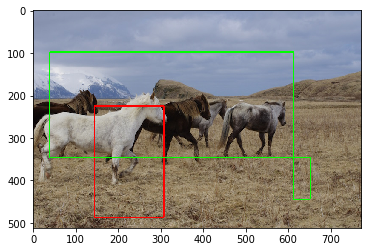

In [68]:
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
plt.show()

In [74]:
import pickle

In [75]:
deb = pickle.load( open( "/tmp/faster_rcnn.pkl", "rb" ) )

In [76]:
deb

{'VIRAT_S_010206_00_000007_000035_frame_0': {'boxes': [[584, 421, 670, 562],
   [692, 416, 754, 557],
   [649, 420, 722, 557]],
  'scores': [0.8840447664260864, 0.8578323721885681, 0.7775968313217163]},
 'VIRAT_S_010206_00_000007_000035_frame_1': {'boxes': [[586, 422, 672, 563],
   [693, 417, 754, 555],
   [649, 420, 723, 557]],
  'scores': [0.8694808483123779, 0.8668422102928162, 0.7805967330932617]},
 'VIRAT_S_010206_00_000007_000035_frame_10': {'boxes': [[595, 428, 690, 575],
   [702, 424, 781, 569],
   [656, 425, 734, 571]],
  'scores': [0.8976899981498718, 0.8437972664833069, 0.6619056463241577]},
 'VIRAT_S_010206_00_000007_000035_frame_100': {'boxes': [[785, 529, 885, 710],
   [916, 519, 1017, 703]],
  'scores': [0.965984582901001, 0.944076418876648]},
 'VIRAT_S_010206_00_000007_000035_frame_101': {'boxes': [[788, 532, 894, 709],
   [926, 521, 1024, 701]],
  'scores': [0.9696646928787231, 0.882759153842926]},
 'VIRAT_S_010206_00_000007_000035_frame_102': {'boxes': [[791, 535, 897

In [77]:
type(list(deb['VIRAT_S_010206_00_000007_000035_frame_0']['boxes'][0])[0])

int